<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Exercise: Feed-forward NNs for Structured Data Classification - Day 1 </h1>

<hr />
<center>Constructor Academy, 2025</center>

## Introduction

The idea of this exercise is to learn how to do structured data classification using neural networks, starting from a raw
CSV file. Our data includes both numerical and categorical features.

### The dataset

[Our dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) is provided by the
Cleveland Clinic Foundation for Heart Disease.
It's a CSV file with 303 rows. Each row contains information about a patient (a
**sample**), and each column describes an attribute of the patient (a **feature**). We
use the features to predict whether a patient has a heart disease (**binary
classification**).

Here's the description of each feature:

Column| Description| Feature Type
------------|--------------------|----------------------
Age | Age in years | Numerical
Sex | (1 = male; 0 = female) | Categorical
CP | Chest pain type (0, 1, 2, 3, 4) | Categorical
Trestbpd | Resting blood pressure (in mm Hg on admission) | Numerical
Chol | Serum cholesterol in mg/dl | Numerical
FBS | fasting blood sugar in 120 mg/dl (1 = true; 0 = false) | Categorical
RestECG | Resting electrocardiogram results (0, 1, 2) | Categorical
Thalach | Maximum heart rate achieved | Numerical
Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical
Oldpeak | ST depression induced by exercise relative to rest | Numerical
Slope | Slope of the peak exercise ST segment | Numerical
CA | Number of major vessels (0-3) colored by fluoroscopy | Both numerical & categorical
Thal | 3 = normal; 6 = fixed defect; 7 = reversible defect | Categorical
Target | Diagnosis of heart disease (1 = true; 0 = false) | Target

## Key Objectives - Day 1


1. Your key task is to perform a binary classification problem to predict heart disease based on the given data by splitting it into train-valid-test datasets

2. You will build a variety of dense neural network models starting from simple 1-layer NNs to 2 and 3 layer dense NNs

3. You will also plot learning curves to visualize training performance over epochs

4. You will also evaluate the performance of the models on the test dataset

5. You will also build a model using class weights to tackle class imbalance



## Load Dependencies

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
tf.random.set_seed(42) # reproducibility

## Load the dataset

Let's download the data and load it into a Pandas dataframe:

In [4]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

The dataset includes 303 samples with 14 columns per sample (13 features, plus the target
label):

Here's a preview of a few samples:

The last column, "target", indicates whether the patient has a heart disease (1) or not
(0).

Age	Age in years	Numerical
Sex	(1 = male; 0 = female)	Categorical
CP	Chest pain type (0, 1, 2, 3, 4)	Categorical
Trestbpd	Resting blood pressure (in mm Hg on admission)	Numerical
Chol	Serum cholesterol in mg/dl	Numerical
FBS	fasting blood sugar in 120 mg/dl (1 = true; 0 = false)	Categorical
RestECG	Resting electrocardiogram results (0, 1, 2)	Categorical
Thalach	Maximum heart rate achieved	Numerical
Exang	Exercise induced angina (1 = yes; 0 = no)	Categorical
Oldpeak	ST depression induced by exercise relative to rest	Numerical
Slope	Slope of the peak exercise ST segment	Numerical
CA	Number of major vessels (0-3) colored by fluoroscopy	Both numerical & categorical
Thal	3 = normal; 6 = fixed defect; 7 = reversible defect	Categorical
Target	Diagnosis of heart disease (1 = true; 0 = false)	Target

## Check the distribution of the target column

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Reshape column to 2D since OrdinalEncoder expects a 2D array
encoder = OrdinalEncoder()
df['thal_encoded'] = encoder.fit_transform(df[['thal']])

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', "thal"], axis=1)
y = df['target']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Second split: validation (20%) and test (20%) from the temp (40%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [7]:
cat_features = ["sex" , "cp" , "fbs" , "restecg" , "exang"  , "thal_encoded"]
num_features = ["age" , "trestbps" , "chol" , "thalach" , "oldpeak" , "ca" , "slope"]

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']

categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore").set_output(transform="pandas"))])

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler().set_output(transform="pandas"))])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, num_features),
                                               ("cat", categorical_transformer, cat_features)]).set_output(transform="pandas")

import pandas as pd

# If X_train is currently a NumPy array, convert it back to DataFrame
X_train = pd.DataFrame(X_train, columns=cat_features + num_features)
X_val = pd.DataFrame(X_val, columns=cat_features + num_features)
X_test = pd.DataFrame(X_test, columns=cat_features + num_features)

new_X_train=preprocessor.fit_transform(X_train)
new_X_valid = preprocessor.transform(X_val)
new_X_test = preprocessor.transform(X_test)

## Task 1: Split Dataset into Train, Validation and Test Datasets

Use stratified sampling to ensure similar `target` class distribution in the dataset splits when using `train_test_split()`

Use a split of 60:20:20 for train-valid-test splits
For reproducibility set the `random_state` to `42`

## Task 2: Data Pre-processing

Recall the data pre-processing you had learnt during the ML week! Perform the following tasks to have clean and pre-processed datasets for your training, validation and test datasets.

Key Steps:

1. One-hot encode categorical data
2. Standard Scaling numerical data
3. Combine categorical and numeric data together into a single dataframe \ numpy array

Hints: Leverage code from [here](https://colab.research.google.com/drive/1ISCLIEkrLhtNo0r-hAmA6fYA6nkB1o59) [pre-processing parts only]

## Task 3: Training simple 1-layer Neural Networks

Run the following experiments separately to train 1-layer neural networks, evaluate the performance by looking at learning curve plots and finally check the performance of each of the following models on the test dataset.

Key workflow:

- Build model using architecture specification based on experiment
- Plot learning curves from model training to visualize performance over epochs on training and validation data
- Use trained model to predict and evaluate performance on test data
- Build separate models for each experiment


### Experiment 1 - Basic NN:
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- learning rate: 0.001
- optimizer is SGD
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- epochs: 500
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 2 - NN with Adam Optimizer:
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- learning rate: 0.001
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- epochs: 500
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 3 - Experiment with lower Learning Rate:
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- epochs: 500
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 4 - Experiment with Early Stopping:
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports




### Hint: Utility function for plotting learning curves

You can use the following function to plot the learning curves after training.

Remember to do the following during training:

```
history = model.fit(.......)

# to plot the curves
plot_metrics(history)
```

In [9]:
import matplotlib.pyplot as plt


def plot_metrics(history):

  keys = history.history.keys()
  metrics = ['loss', 'accuracy', 'precision', 'recall']
  plt.figure(figsize=(12, 10))
  for n, metric in enumerate(metrics):
    name = metric.capitalize()
    metric_name = [item for item in keys if metric in item and 'val_'+metric not in item][0]
    val_metric_name = [item for item in keys if 'val_'+metric in item][0]

    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric_name], color='b', label='Train')
    plt.plot(history.epoch, history.history[val_metric_name], color='r',
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

## Complete Task 3 Below

pandas.core.frame.DataFrame

In [12]:
new_X_train[:1]

,num__age,num__trestbps,num__chol,num__thalach,num__oldpeak,num__slope,cat__sex_0,cat__sex_1,cat__cp_0,cat__cp_1,...,cat__restecg_0,cat__restecg_1,cat__restecg_2,cat__exang_0,cat__exang_1,cat__ca_0,cat__ca_1,cat__ca_2,cat__ca_3,cat__thal_nan
67,-1.498058,0.196726,-0.831269,-0.759594,-0.917244,0.593418,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
print(new_X_train.shape[1:])  # Should be (num_samples, 13)
print(y_train.shape)  # Should be (num_samples,) or (num_samples, 1)


(25,)
(181,)


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.5467 - loss: 0.7035 - precision: 0.2028 - recall: 0.2337 - val_accuracy: 0.5410 - val_loss: 0.7103 - val_precision: 0.2105 - val_recall: 0.2353
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5467 - loss: 0.7002 - precision: 0.2028 - recall: 0.2337 - val_accuracy: 0.5574 - val_loss: 0.7074 - val_precision: 0.2222 - val_recall: 0.2353
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5517 - loss: 0.6969 - precision: 0.2064 - recall: 0.2337 - val_accuracy: 0.5574 - val_loss: 0.7045 - val_precision: 0.2222 - val_recall: 0.2353
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5517 - loss: 0.6937 - precision: 0.2064 - recall: 0.2337 - val_accuracy: 0.5574 - val_loss: 0.7016 - val_precision: 0.2222 - val_recall: 0.2353
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5517 - loss: 0.6906 - precision: 0.2064 - recall: 0.2337 - val_accuracy: 0.5574 - val_loss: 0.6988 - val_precision:

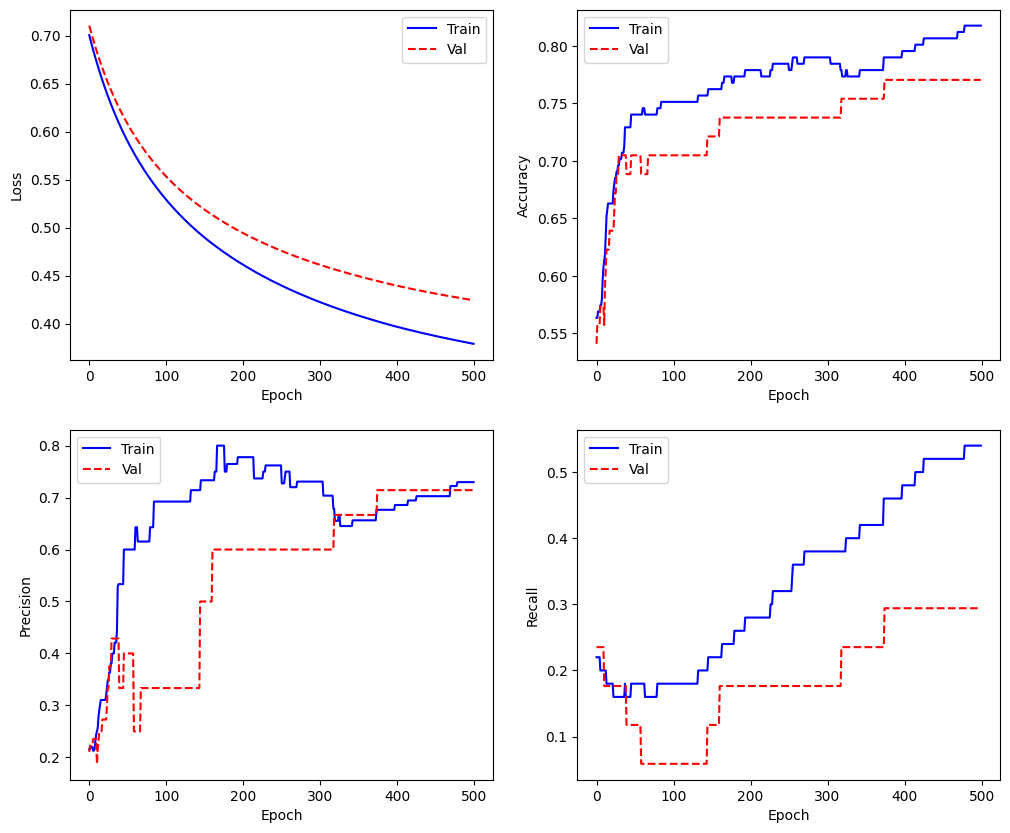

In [15]:
units = 32
epochs = 500
batch_size = 32
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
metrics = ["accuracy" , "precision" , "recall"]
loss = tf.keras.losses.BinaryCrossentropy()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units, activation='relu', input_shape=(25,)),  # Input shape is just (13,)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=metrics
)

history = model.fit(new_X_train, y_train, validation_data=(new_X_valid, y_val), epochs=epochs, batch_size=batch_size)
history

plot_metrics(history)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(new_X_test)
import numpy as np
y_pred = (y_pred_prob > 0.5).astype(int)
model.evaluate(new_X_test, y_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7954 - loss: 0.7878 - precision: 0.7111 - recall: 0.3981
Confusion Matrix:
[[42  3]
 [10  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        45
           1       0.67      0.38      0.48        16

    accuracy                           0.79        61
   macro avg       0.74      0.65      0.67        61
weighted avg       0.77      0.79      0.76        61



Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.3645 - loss: 0.8140 - precision: 0.2951 - recall: 0.9814 - val_accuracy: 0.4262 - val_loss: 0.7897 - val_precision: 0.3200 - val_recall: 0.9412
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4563 - loss: 0.7400 - precision: 0.3119 - recall: 0.8472 - val_accuracy: 0.5082 - val_loss: 0.7297 - val_precision: 0.3488 - val_recall: 0.8824
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5894 - loss: 0.6802 - precision: 0.3814 - recall: 0.8381 - val_accuracy: 0.5574 - val_loss: 0.6801 - val_precision: 0.3611 - val_recall: 0.7647
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6832 - loss: 0.6311 - precision: 0.4532 - recall: 0.7474 - val_accuracy: 0.5410 - val_loss: 0.6393 - val_precision: 0.3103 - val_recall: 0.5294
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7605 - loss: 0.5909 - precision: 0.5593 - recall: 0.6706 - val_accuracy: 0.7213 - val_loss: 0.6068 - val_precision:

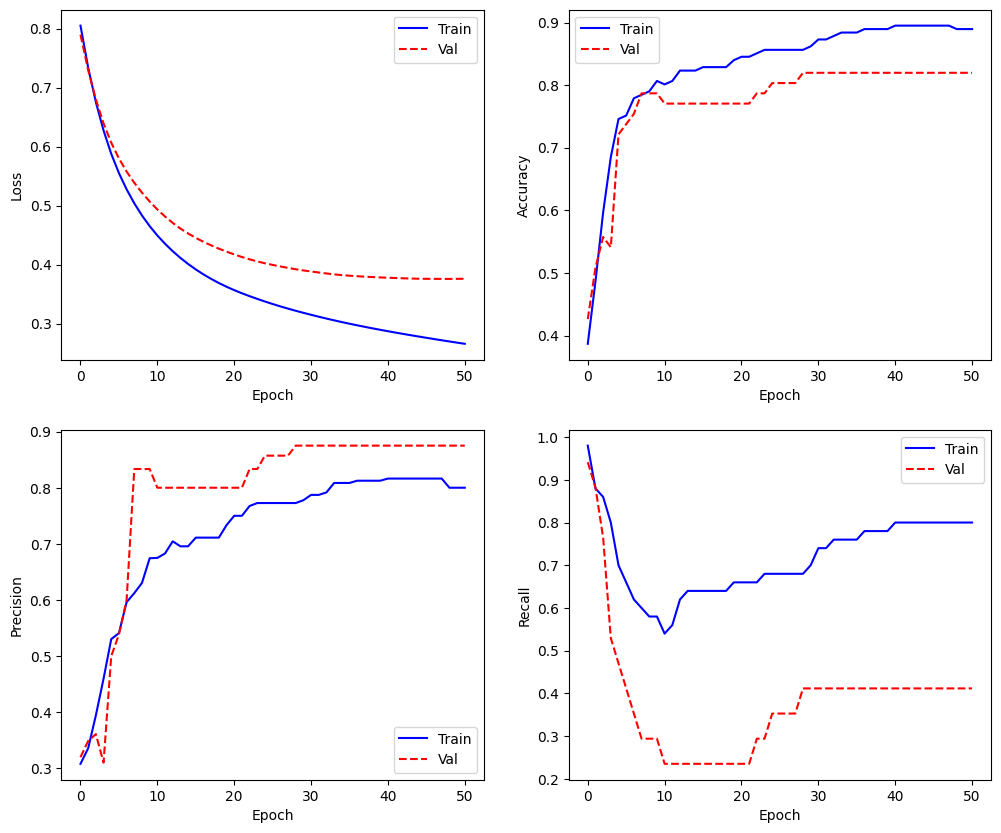

In [24]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='accuracy',
    patience=10,
    restore_best_weights=True
)


units = 32
epochs = 500
batch_size = 32
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ["accuracy" , "precision" , "recall"]
loss = tf.keras.losses.BinaryCrossentropy()

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units, activation='relu', input_shape=(25,)),  # Input shape is just (13,)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

model2.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=metrics
)


history = model2.fit(new_X_train, y_train, validation_data=(new_X_valid, y_val), epochs=epochs, batch_size=batch_size, callbacks=[early_stop])
history

plot_metrics(history)

In [26]:
y_pred_prob = model2.predict(new_X_test)
import numpy as np
y_pred = (y_pred_prob > 0.5).astype(int)
model2.evaluate(new_X_test, y_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7850 - loss: 0.3861 - precision: 0.6742 - recall: 0.4028
Confusion Matrix:
[[41  4]
 [ 9  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        45
           1       0.64      0.44      0.52        16

    accuracy                           0.79        61
   macro avg       0.73      0.67      0.69        61
weighted avg       0.77      0.79      0.77        61



Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.5371 - loss: 0.7739 - precision: 0.3201 - recall: 0.6451 - val_accuracy: 0.4590 - val_loss: 0.7873 - val_precision: 0.3095 - val_recall: 0.7647
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5371 - loss: 0.7734 - precision: 0.3201 - recall: 0.6451 - val_accuracy: 0.4590 - val_loss: 0.7867 - val_precision: 0.3095 - val_recall: 0.7647
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5489 - loss: 0.7728 - precision: 0.3274 - recall: 0.6451 - val_accuracy: 0.4590 - val_loss: 0.7862 - val_precision: 0.3095 - val_recall: 0.7647
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5489 - loss: 0.7723 - precision: 0.3274 - recall: 0.6451 - val_accuracy: 0.4590 - val_loss: 0.7856 - val_precision: 0.3095 - val_recall: 0.7647
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5606 - loss: 0.7718 - precision: 0.3354 - recall: 0.6451 - val_accuracy: 0.4590 - val_loss: 0.7850 - val_precision:

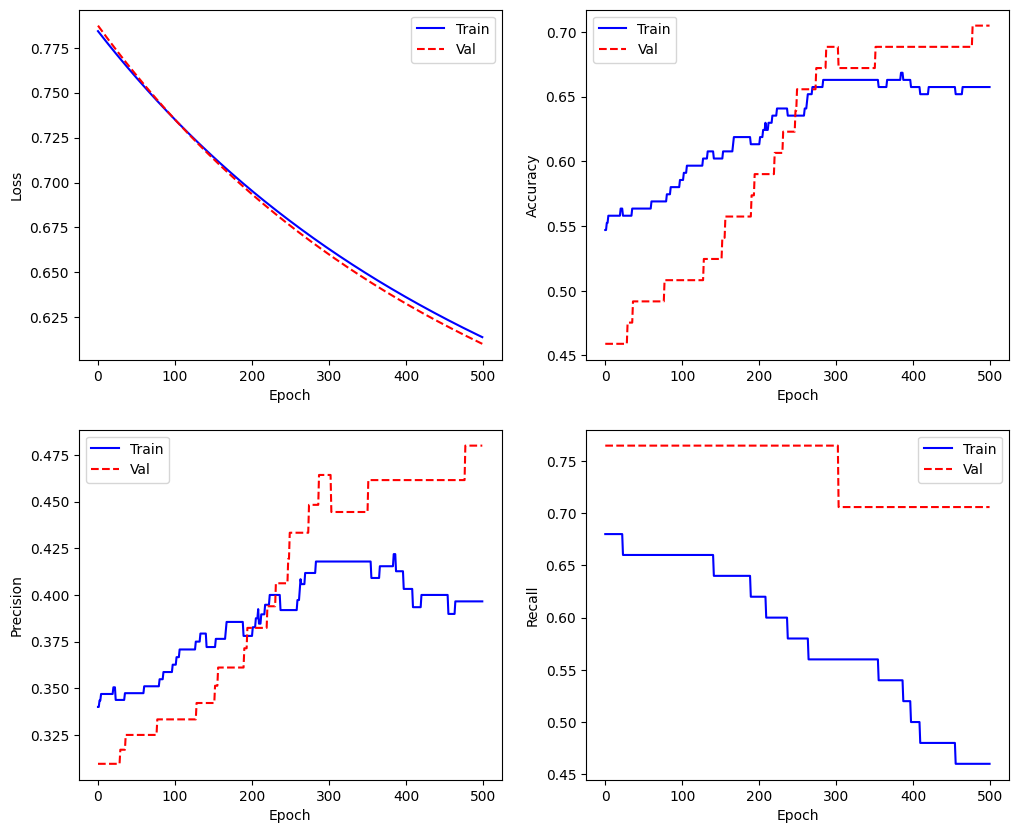

In [22]:
units = 32
epochs = 500
batch_size = 32
learning_rate = 0.0001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
metrics = ["accuracy" , "precision" , "recall"]
loss = tf.keras.losses.BinaryCrossentropy()

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units, activation='relu', input_shape=(25,)),  # Input shape is just (25,)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

model3.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=metrics
)

history = model3.fit(new_X_train, y_train, validation_data=(new_X_valid, y_val), epochs=epochs, batch_size=batch_size)
history

plot_metrics(history)

In [27]:
y_pred_prob = model3.predict(new_X_test)
import numpy as np
y_pred = (y_pred_prob > 0.5).astype(int)
model3.evaluate(new_X_test, y_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6778 - loss: 0.5711 - precision: 0.4190 - recall: 0.5231 
Confusion Matrix:
[[33 12]
 [ 7  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.43      0.56      0.49        16

    accuracy                           0.69        61
   macro avg       0.63      0.65      0.63        61
weighted avg       0.72      0.69      0.70        61



Exception ignored in: <function _xla_gc_callback at 0x7ae77e28e160>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6097 - loss: 0.6837 - precision: 0.3916 - recall: 0.8139 - val_accuracy: 0.5902 - val_loss: 0.6612 - val_precision: 0.3889 - val_recall: 0.8235
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6133 - loss: 0.6833 - precision: 0.3940 - recall: 0.8139 - val_accuracy: 0.5902 - val_loss: 0.6608 - val_precision: 0.3889 - val_recall: 0.8235
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6133 - loss: 0.6828 - precision: 0.3940 - recall: 0.8139 - val_accuracy: 0.5902 - val_loss: 0.6604 - val_precision: 0.3889 - val_recall: 0.8235
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6133 - loss: 0.6823 - precision: 0.3940 - recall: 0.8139 - val_accuracy: 0.5902 - val_loss: 0.6600 - val_precision: 0.3889 - val_recall: 0.8235
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6133 - loss: 0.6819 - precision: 0.3940 - recall: 0.8139 - val_accuracy: 0.5902 - val_loss: 0.6595 - val_precision:

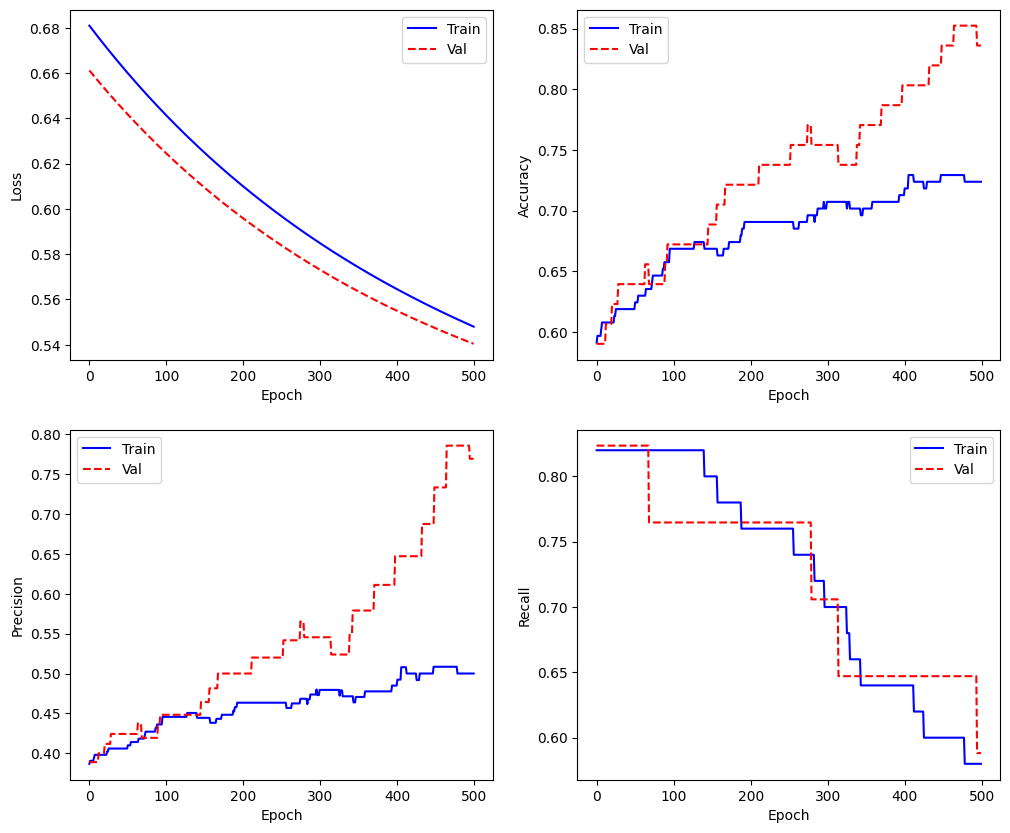

In [29]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True,

)


units = 32
epochs = 1000
batch_size = 32
learning_rate = 0.0001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
metrics = ["accuracy" , "precision" , "recall"]
loss = tf.keras.losses.BinaryCrossentropy()

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units, activation='relu', input_shape=(25,)),  # Input shape is just (25,)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

model4.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=metrics
)

history = model4.fit(new_X_train, y_train, validation_data=(new_X_valid, y_val), epochs=epochs, batch_size=batch_size)
history

plot_metrics(history)

In [30]:
y_pred_prob = model4.predict(new_X_test)
import numpy as np
y_pred = (y_pred_prob > 0.5).astype(int)
model4.evaluate(new_X_test, y_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6882 - loss: 0.5740 - precision: 0.4174 - recall: 0.4028
Confusion Matrix:
[[35 10]
 [ 9  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        45
           1       0.41      0.44      0.42        16

    accuracy                           0.69        61
   macro avg       0.60      0.61      0.61        61
weighted avg       0.69      0.69      0.69        61



## Task 4: Training deep multi-layer Neural Networks

Run the following experiments separately to train multi-layer neural networks, evaluate the performance by looking at learning curve plots and finally check the performance of each of the following models on the test dataset.

Key workflow:

- Build model using architecture specification based on experiment
- Plot learning curves from model training to visualize performance over epochs on training and validation data
- Use trained model to predict and evaluate performance on test data
- Build separate models for each experiment


### Experiment 1 -  2-layer NN:  
- __2-Dense Hidden Layer, 32 units, `relu` activation function__
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 2 -  3-layer NN:  
- __3-Dense Hidden Layer, 32 units, `relu` activation function__
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports


## Complete Task 4 Below

In [31]:
X_train.shape

(181, 13)

In [ ]:
tf.keras.backend.clear_session()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True,

)


units = 32
epochs = 1000
batch_size = 32
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ["accuracy" , "precision" , "recall"]
loss = tf.keras.losses.BinaryCrossentropy()

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units, activation='relu', input_shape=(25,)),  # Input shape is just (25,)
     tf.keras.layers.Dense(units, activation='relu', input_shape=(25,)),  # Input shape is just (25,)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

model5.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=metrics
)

history = model5.fit(new_X_train, y_train, validation_data=(new_X_valid, y_val), epochs=epochs, batch_size=batch_size)

plot_metrics(history)

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7251 - loss: 0.5808 - precision: 0.4701 - recall: 0.1709 - val_accuracy: 0.6885 - val_loss: 0.5833 - val_precision: 0.3333 - val_recall: 0.1176
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7286 - loss: 0.5765 - precision: 0.4867 - recall: 0.1709 - val_accuracy: 0.6885 - val_loss: 0.5798 - val_precision: 0.3333 - val_recall: 0.1176
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7286 - loss: 0.5725 - precision: 0.4867 - recall: 0.1709 - val_accuracy: 0.6885 - val_loss: 0.5764 - val_precision: 0.3333 - val_recall: 0.1176
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7236 - loss: 0.5685 - precision: 0.4591 - recall: 0.1523 - val_accuracy: 0.6885 - val_loss: 0.5730 - val_precision: 0.3333 - val_recall: 0.1176
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7353 - loss: 0.5646 - precision: 0.5696 - recall: 0.1523 - val_accuracy: 0.6885 - val_loss: 0.5696 - val_precis

In [ ]:
y_pred_prob = model4.predict(new_X_test)
import numpy as np
y_pred = (y_pred_prob > 0.5).astype(int)
model4.evaluate(new_X_test, y_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Task 5: Training deep multi-layer Neural Networks with Class Weights to tackle Class Imbalance

We know that our dataset is heavily imbalanced between the two classes, feel free to leverage the`class_weight` parameter in the `model.fit()` function and experiment with your own weights or use [compute class weight](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) from `sklearn`


Run the following experiment to train multi-layer neural networks, evaluate the performance by looking at learning curve plots and finally check the performance of each of the following models on the test dataset.

Key workflow:

- Build model using architecture specification based on experiment
- Plot learning curves from model training to visualize performance over epochs on training and validation data
- Use trained model to predict and evaluate performance on test data
- Play around with the `class_weight` parameter when training


### Experiment 1 -  3-layer NN:  
- __3-Dense Hidden Layer, 32 units, `relu` activation function__
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- __Modify `class_weight` in `model.fit()`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports


## Complete Task 5 Below